In [2]:
#import section
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.palettes import RdYlGn, Spectral6, cividis
from bokeh.transform import linear_cmap
from bokeh.io import output_notebook
from bokeh.models import PolyAnnotation, Range1d
from bokeh.layouts import row

/Users/francesco/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [15]:
#richiesta e scrittura del file
url = 'https://onedrive.live.com/download.aspx?resid=214F842E8CF74F00!1571&ithint=file%2cxlsx&authkey=!AJLou3yLbKPnlLo'
r = requests.get(url)
open('temp.xls', 'wb').write(r.content)

#creazione dei due dataframe - resource description/resource location
df1 = pd.read_excel('temp.xls', 'Resource location')
df2 = pd.read_excel('temp.xls', 'Resource description')

#eliminazione delle colonne non necessarie per l'analisi
df1 = df1.drop(['sub_resource_name'], axis=1)
df2 = df2.drop(['Resource title', 'Resource abstract', 'Temporal extent',
       'Update frequency', 'Language', 'CRS',
       'Representation type', 'Format',
       'Spatial Resolution (Scale or grid size)', 'MMU', 'INSPIRE theme',
       'Access conditions', 'Proliferation in CLC+ instances allowed?',
       'Data costs', 'Resource locator (URL)', 'Resource provider',
       'INSPIRE locator', 'CORDA locator', 'Comments', 'New URL',
       'Unnamed: 22'], axis=1)

#join delle due tabelle sulla base dell'id
result = df1.join(df2, on="resource_id")

#display del dataframe
result

/Users/francesco/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,resource_id,wfs,wfs_provided_score,wfs_derived_score,wms,wms_provided_score,wms_derived_score,ArcGis_REST_server,ArcGis_REST_server_provided_score,ArcGis_REST_server_derived_score,direct_download,metadata_site,metadata_xml,license,note,id,Coverage
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC BY 3.0,questo dato è tabulare. Il download del file ....,2,EMILIA ROMAGNA
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dato derivante da un incrocio di sources,3,EMILIA ROMAGNA
2,3,NaN,NaN,NaN,https://servizigis.regione.emilia-romagna.it/w...,provided-working-2,NaN,NaN,NaN,NaN,https://ambiente.regione.emilia-romagna.it/it/...,https://datacatalog.regione.emilia-romagna.it/...,NaN,CC BY 2.5,l'unico metadato disponibile è direttamente la...,4,EMILIA ROMAGNA
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disponibile link alla risorsa ma non funziona:...,5,EMILIA ROMAGNA
4,5,http://servizigis.regione.emilia-romagna.it/wf...,NaN,derived-notWorking-0,http://servizigis.regione.emilia-romagna.it/wm...,provided-semiWorking-1,NaN,NaN,NaN,NaN,https://geoportale.regione.emilia-romagna.it/a...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,WFS request è fornita ma non funziona. WMS req...,6,EMILIA ROMAGNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,253,NaN,NaN,NaN,NaN,NaN,NaN,http://geo.umbriaterritorio.it/ArcGIS/rest/ser...,semiWorking-1,NaN,NaN,https://geodati.gov.it/resource/id/r_umbria:00...,https://geodati.gov.it/geoportalRNDTPA/rest/do...,http://www.umbriageo.regione.umbria.it/pagine/...,i dati possono essere richiesti seguendo le is...,253,UMBRIA
256,259,NaN,NaN,NaN,https://siat.regione.umbria.it/arcgis/services...,provided-working-2,NaN,https://siat.regione.umbria.it/arcgis/rest/ser...,working-2,NaN,http://geo.umbriaterritorio.it/umbriageo/atlan...,https://geodati.gov.it/resource/id/r_umbria:00...,https://geodati.gov.it/geoportalRNDTPA/rest/do...,http://www.umbriageo.regione.umbria.it/pagine/...,NaN,259,UMBRIA
257,264,NaN,NaN,NaN,NaN,NaN,NaN,http://geo.umbriaterritorio.it/ArcGIS/rest/ser...,semiWorking-1,NaN,NaN,https://data.europa.eu/data/datasets/r_umbria-...,NaN,NaN,La connessione al server funziona bene per rep...,264,UMBRIA
258,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.istat.it/storage/cartografia/basi_...,NaN,https://www.istat.it/it/files//2013/11/Metadat...,CC BY 3.0,NaN,268,ITALIA


In [16]:
italy = gpd.read_file('italian_regions/Reg01012022_g_WGS84.shp')[['COD_REG','DEN_REG','geometry']]
italy = italy.drop(['COD_REG'], axis=1)
itlay = italy.copy()

#estraggo lista nomi regioni da geodataframe
region_names = list(italy.DEN_REG)

#rendo nomi regioni maiuscoli per uniformare
for i in range (len(region_names)):
    region_names[i] = region_names[i].upper() 

#assegno la colonna di nomi maiuscoli al dataframe
italy['DEN_REG'] = region_names
    
italy

,DEN_REG,geometry
0,PIEMONTE,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,VALLE D'AOSTA,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,LOMBARDIA,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,TRENTO,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,VENETO,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,FRIULI VENEZIA GIULIA,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,LIGURIA,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,EMILIA ROMAGNA,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,TOSCANA,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,UMBRIA,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


- ACCESSIBILITA' DATO:
$\\ DIRECT\_DOWNLOAD \bullet 0.8 + REQUEST \bullet 0.2$


- REPERIBILITA' INFORMAZIONI:
    $\\ METADATI \bullet 0.8 + LICENZA \bullet 0.2$

In [17]:
#calcolo valori fondamentali e scores per ogni regione
region_scores = []
result = result.fillna(0)
for i in range(len(region_names)):
    partial = result[result.Coverage == region_names[i]]
    
    #totale risorse analizzate per singola regione
    tot = len(partial.index)
    
    
    # INFO SULLA REPERIBILITà INFORMAZIONI +++++++++++++++++++++++++++++++++++++++++++++++
    
    #calcolo valori fondamentali e scores per ogni regione    
    count=0
    for idx, row in partial.iterrows():
        if row.metadata_xml != 0 or row.metadata_site != 0:
            count = count + 1
                
    #risorse con metadati per singola regione           
    num_meta = count      
    
    #risorse delle quali è specificata la licenza per singola regione
    num_license = len(partial.loc[partial.license != 0,:])
    
    # INFO SULLA ACCESSIBLITà DATO +++++++++++++++++++++++++++++++++++++++++++++++
    #risorse delle quali è disponibile il direct download per singola regione
    num_dd = len(partial.loc[partial.direct_download != 0, :])
    
    #risorse per le quali è fornita qualche tipo di request per singola regione
    num_req_provided = len(partial.loc[(partial.wfs != 0) | (partial.wms != 0) | (partial.ArcGis_REST_server != 0)])


       
    #risorse per le quali è fornita qualche tipo di request funzionante per singola regione
    num_req_provided_working = len(partial.loc[((partial.wfs != 0) & (partial.wfs_provided_score == 'provided-working-2')) | 
           ((partial.wms != 0) & (partial.wms_provided_score == 'provided-working-2')) | 
           ((partial.ArcGis_REST_server != 0) & (partial.ArcGis_REST_server_provided_score == 'working-2'))])
    
    try:
        meta = num_meta/tot
        license = num_license/tot
        dd = num_dd/tot
        req_p = num_req_provided/tot
    except:
        meta = 0
        license = 0
        dd = 0
        req_p = 0
        
        
    try:
        req_p_w = num_req_provided_working/num_req_provided
    except:
        req_p_w = 0
        
        
    rep_info = meta*0.8 + license*0.2
    acc_dato = req_p_w*0.2 + dd*0.8
    score = rep_info*0.5 + acc_dato*0.5
    

    single_region = [region_names[i], meta, license, dd, req_p, req_p_w, rep_info, acc_dato, score, tot]
    region_scores.append(single_region)
    
scores = pd.DataFrame(region_scores, columns= ['region_name','metadata','license','direct_download','provided_requests','working_requests','reperibilita_info_globale','accessibilita_dato_globale','SCORE', 'evalueted_resources'])


In [6]:
scores

,region_name,metadata,license,direct_download,provided_requests,working_requests,reperibilita_info_globale,accessibilita_dato_globale,SCORE,evalueted_resources
0,PIEMONTE,1.000000,1.000000,0.909091,0.409091,0.222222,1.000000,0.771717,0.885859,22
1,VALLE D'AOSTA,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,1
2,LOMBARDIA,1.000000,1.000000,0.629630,0.962963,0.923077,1.000000,0.688319,0.844160,27
3,TRENTO,1.000000,1.000000,0.666667,0.111111,0.000000,1.000000,0.533333,0.766667,9
4,VENETO,1.000000,1.000000,0.750000,0.500000,0.000000,1.000000,0.600000,0.800000,4
5,FRIULI VENEZIA GIULIA,0.833333,0.833333,0.333333,0.166667,1.000000,0.833333,0.466667,0.650000,6
6,LIGURIA,0.666667,1.000000,0.866667,0.400000,0.833333,0.733333,0.860000,0.796667,15
7,EMILIA ROMAGNA,0.655172,0.793103,0.586207,0.724138,0.904762,0.682759,0.649918,0.666338,29
8,TOSCANA,0.600000,0.900000,0.800000,0.100000,0.000000,0.660000,0.640000,0.650000,10
9,UMBRIA,0.771429,0.742857,0.600000,0.371429,0.461538,0.765714,0.572308,0.669011,35


In [7]:
merged_df = italy.merge(scores, left_on="DEN_REG", right_on="region_name")

Text(0.5, 1.0, 'Accessibilità dato')

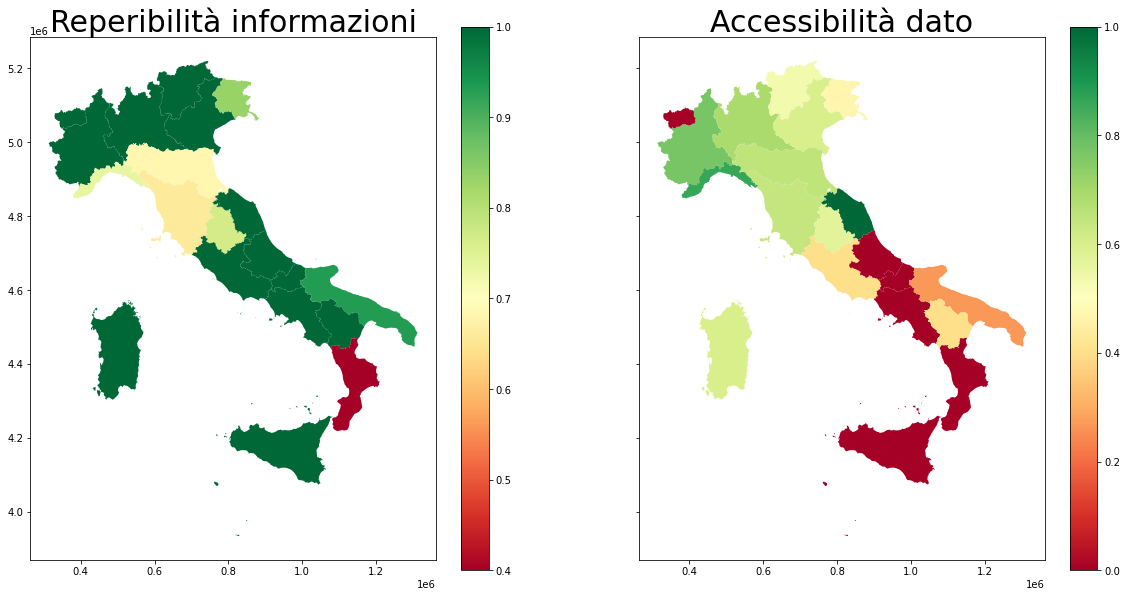

In [8]:
#creazione del plot


fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
merged_df.plot(ax=ax1, column='reperibilita_info_globale', legend=True, cmap='RdYlGn')
ax1.set_title('Reperibilità informazioni', fontsize=30)
merged_df.plot(ax=ax2, column='accessibilita_dato_globale', legend=True, cmap='RdYlGn')
ax2.set_title('Accessibilità dato', fontsize=30)

#merged_df.plot(column="SCORE", figsize=(10,10), legend=True, cmap='RdYlGn')


In [9]:
output_notebook()
regions = [region for region in merged_df.region_name]
p = figure(x_range = regions)
p.vbar()

regions = [region for region in merged_df.region_name]
counts = [res for res in merged_df.evalueted_resources]

p = figure(x_range=regions, height=350, width=800, title="Risorse per regione",
           toolbar_location=None, tools="")

p.vbar(x=regions, top=counts, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2

show(p)

Loading BokehJS ...

In [10]:
merged_df

,DEN_REG,geometry,region_name,metadata,license,direct_download,provided_requests,working_requests,reperibilita_info_globale,accessibilita_dato_globale,SCORE,evalueted_resources
0,PIEMONTE,"POLYGON ((457749.464 5145501.795, 458662.395 5...",PIEMONTE,1.000000,1.000000,0.909091,0.409091,0.222222,1.000000,0.771717,0.885859,22
1,VALLE D'AOSTA,"POLYGON ((390652.644 5091766.171, 390748.643 5...",VALLE D'AOSTA,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,1
2,LOMBARDIA,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",LOMBARDIA,1.000000,1.000000,0.629630,0.962963,0.923077,1.000000,0.688319,0.844160,27
3,TRENTO,"POLYGON ((743267.749 5219765.793, 743387.812 5...",TRENTO,1.000000,1.000000,0.666667,0.111111,0.000000,1.000000,0.533333,0.766667,9
4,VENETO,"POLYGON ((768123.960 5175397.497, 768135.210 5...",VENETO,1.000000,1.000000,0.750000,0.500000,0.000000,1.000000,0.600000,0.800000,4
5,FRIULI VENEZIA GIULIA,"MULTIPOLYGON (((872344.457 5061894.048, 872344...",FRIULI VENEZIA GIULIA,0.833333,0.833333,0.333333,0.166667,1.000000,0.833333,0.466667,0.650000,6
6,LIGURIA,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",LIGURIA,0.666667,1.000000,0.866667,0.400000,0.833333,0.733333,0.860000,0.796667,15
7,EMILIA ROMAGNA,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",EMILIA ROMAGNA,0.655172,0.793103,0.586207,0.724138,0.904762,0.682759,0.649918,0.666338,29
8,TOSCANA,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",TOSCANA,0.600000,0.900000,0.800000,0.100000,0.000000,0.660000,0.640000,0.650000,10
9,UMBRIA,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",UMBRIA,0.771429,0.742857,0.600000,0.371429,0.461538,0.765714,0.572308,0.669011,35


In [11]:
output_notebook()

p = figure(width=800, height=400)

x = list(merged_df['reperibilita_info_globale'])
y = list(merged_df['accessibilita_dato_globale'])
reperibilita_informazioni = list(merged_df['reperibilita_info_globale']),
accessibilita_dato = list(round(merged_df['accessibilita_dato_globale'],2)),
size = [np.log(nr)*20 for nr in merged_df.evalueted_resources]  

source = ColumnDataSource(data=dict(
    region=list(merged_df['region_name']),
    number=list(merged_df['evalueted_resources']),
    reperibilita_informazioni = list(merged_df['reperibilita_info_globale']),
    accessibilita_dato = list(merged_df['accessibilita_dato_globale']),
    x=x,
    y=y,
    size = size
    
))

TOOLTIPS = [
    ("# Region", "@region"),
    ("# resources", "@number"),
    ("# reperibilità info", "@reperibilita_informazioni"),
    ("# accessiblità dato", "@accessibilita_dato"),
    ("(x,y)", "($x, $y)"),  
]

p = figure(width=900, height=700, tooltips=TOOLTIPS, title="Reperibità informazioni - Accessibilità dato")
p.x_range=Range1d(-0.1,1.1)
p.y_range=Range1d(-0.1,1.1)
p.title.text_font_size = "25px"
p.circle('x','y', line_color='black', fill_alpha=0.5, size='size', source=source)
p.xaxis.axis_label = "Reperibilita informazioni"
p.yaxis.axis_label = "Accessibilità dato"

show(p)

Loading BokehJS ...

In [12]:
#applicazione di un Unsupervised Machine Learning algorithm per trovare 3 clusters di regioni
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 4)

label = k_means.fit_predict(merged_df[['reperibilita_info_globale', 'accessibilita_dato_globale']])

filtered_label1 = merged_df[label == 0]
filtered_label2 = merged_df[label == 1]
filtered_label3 = merged_df[label == 2]
filtered_label4 = merged_df[label == 3]

In [13]:
colors = []
for classe in label:
    if classe == 0: 
        colors.append('#A056DB')
    elif classe == 1: 
        colors.append('#6B9CF2') 
    elif classe == 2: 
        colors.append('#56DBB5')
    else:
        colors.append('#FA6D7C')

        
x = list(merged_df['reperibilita_info_globale'])
y = list(merged_df['accessibilita_dato_globale'])
reperibilita_informazioni = list(merged_df['reperibilita_info_globale']),
accessibilita_dato = list(round(merged_df['accessibilita_dato_globale'],2)),
size = [np.log(nr)*20 for nr in merged_df.evalueted_resources]  

source = ColumnDataSource(data=dict(
    region=list(merged_df['region_name']),
    number=list(merged_df['evalueted_resources']),
    reperibilita_informazioni = list(merged_df['reperibilita_info_globale']),
    accessibilita_dato = list(merged_df['accessibilita_dato_globale']),
    x=x,
    y=y,
    size = size,
    colori = colors
    
))
        

TOOLTIPS = [
    ("# Region", "@region"),
    ("# resources", "@number"),
    ("# reperibilità info", "@reperibilita_informazioni"),
    ("# accessiblità dato", "@accessibilita_dato"),
    ("(x,y)", "($x, $y)"),  
]

p = figure(width=900, height=700, title = "Clusters", tooltips=TOOLTIPS)
p.x_range=Range1d(-0.1,1.1)
p.y_range=Range1d(-0.1,1.1)
p.xaxis.axis_label = 'Reperibilità informazioni'
p.yaxis.axis_label = 'Accessiblità dato'

p.circle('x', 'y', color='colori', fill_alpha=0.2, size='size', source=source)

show(p)

In [14]:
def regional_report(nome_regione):
    nome_regione = nome_regione.upper()
    row = merged_df[merged_df.region_name == nome_regione]
    
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(figsize=(20,20), edgecolor='white', constrained_layout=True)
    fig.suptitle(nome_regione, fontsize=40)
    for col,i in zip(merged_df.columns[4:8], range(len(merged_df.columns[3:13]))):
        plt.subplot(5,2,i+1)
        plt.pie([float(row[col]),abs(1-float(row[col]))],radius = 1.7, labels=['disponibili','non disponibili'],autopct='%0.1f%%')
        plt.title(col)
    plt.show()

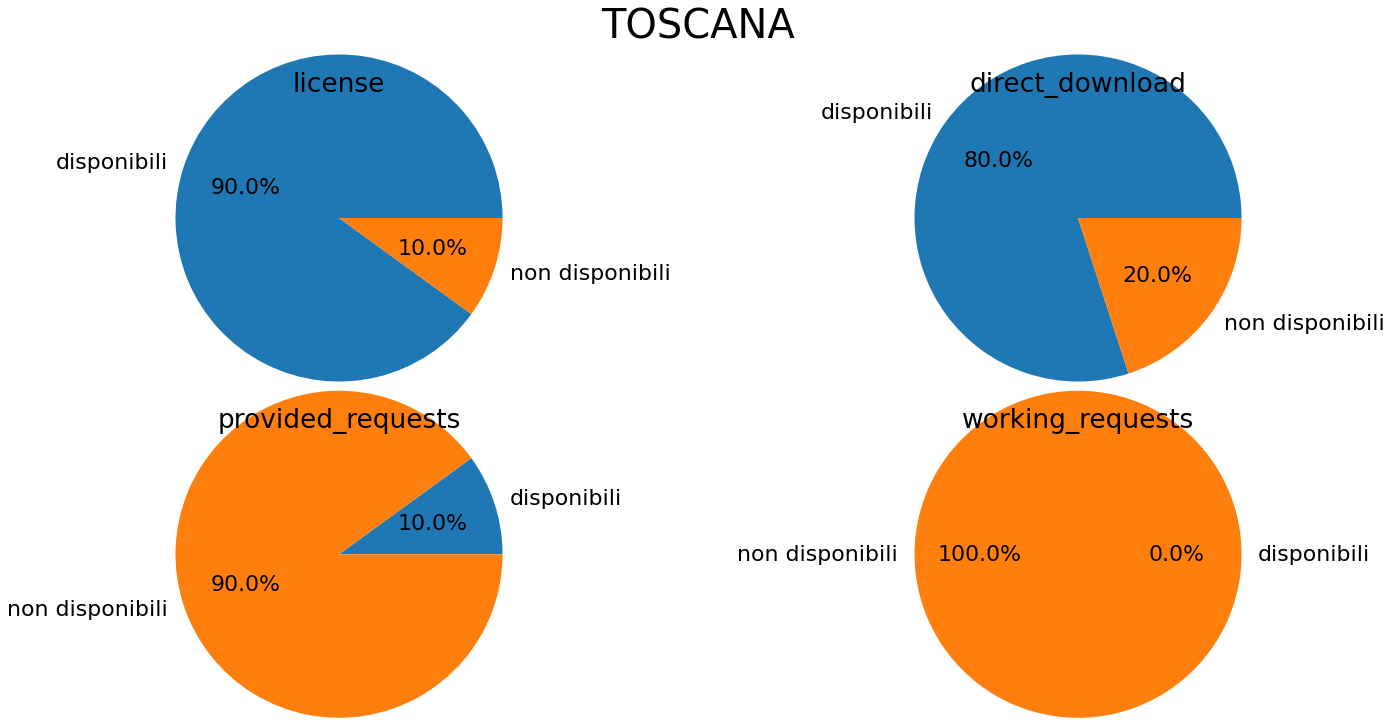

In [56]:
regional_report('ToscanA')

In [16]:
result

,resource_id,wfs,wfs_provided_score,wfs_derived_score,wms,wms_provided_score,wms_derived_score,ArcGis_REST_server,ArcGis_REST_server_provided_score,ArcGis_REST_server_derived_score,direct_download,metadata_site,metadata_xml,license,note,id,Coverage
0,1,0,0,0,0,0,0,0,0,0,0,0,0,CC BY 3.0,questo dato è tabulare. Il download del file ....,2,EMILIA ROMAGNA
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,dato derivante da un incrocio di sources,3,EMILIA ROMAGNA
2,3,0,0,0,https://servizigis.regione.emilia-romagna.it/w...,provided-working-2,0,0,0,0,https://ambiente.regione.emilia-romagna.it/it/...,https://datacatalog.regione.emilia-romagna.it/...,0,CC BY 2.5,l'unico metadato disponibile è direttamente la...,4,EMILIA ROMAGNA
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,disponibile link alla risorsa ma non funziona:...,5,EMILIA ROMAGNA
4,5,http://servizigis.regione.emilia-romagna.it/wf...,0,derived-notWorking-0,http://servizigis.regione.emilia-romagna.it/wm...,provided-semiWorking-1,0,0,0,0,https://geoportale.regione.emilia-romagna.it/a...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,WFS request è fornita ma non funziona. WMS req...,6,EMILIA ROMAGNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,253,0,0,0,0,0,0,http://geo.umbriaterritorio.it/ArcGIS/rest/ser...,semiWorking-1,0,0,https://geodati.gov.it/resource/id/r_umbria:00...,https://geodati.gov.it/geoportalRNDTPA/rest/do...,http://www.umbriageo.regione.umbria.it/pagine/...,i dati possono essere richiesti seguendo le is...,253,UMBRIA
256,259,0,0,0,https://siat.regione.umbria.it/arcgis/services...,provided-working-2,0,https://siat.regione.umbria.it/arcgis/rest/ser...,working-2,0,http://geo.umbriaterritorio.it/umbriageo/atlan...,https://geodati.gov.it/resource/id/r_umbria:00...,https://geodati.gov.it/geoportalRNDTPA/rest/do...,http://www.umbriageo.regione.umbria.it/pagine/...,0,259,UMBRIA
257,264,0,0,0,0,0,0,http://geo.umbriaterritorio.it/ArcGIS/rest/ser...,semiWorking-1,0,0,https://data.europa.eu/data/datasets/r_umbria-...,0,0,La connessione al server funziona bene per rep...,264,UMBRIA
258,268,0,0,0,0,0,0,0,0,0,https://www.istat.it/storage/cartografia/basi_...,0,https://www.istat.it/it/files//2013/11/Metadat...,CC BY 3.0,0,268,ITALIA


In [17]:
result.loc[(result.Coverage == "TOSCANA") & ((result.metadata_xml != 0) | (result.metadata_site != 0)) & (result.license == 0)]
                                             

,resource_id,wfs,wfs_provided_score,wfs_derived_score,wms,wms_provided_score,wms_derived_score,ArcGis_REST_server,ArcGis_REST_server_provided_score,ArcGis_REST_server_derived_score,direct_download,metadata_site,metadata_xml,license,note,id,Coverage
102,112,0,0,0,https://www502.regione.toscana.it/wmsraster/co...,provided-semiWorking-1,0,0,0,0,0,https://www502.regione.toscana.it/geoscopio/se...,0,0,0,112,TOSCANA


In [18]:
# % di metadati che non riportano la licenza
num = len(result.loc[((result.metadata_xml != 0) | (result.metadata_site != 0)) & (result.license == 0)])
den = len(result)
num/den * 100

3.076923076923077

In [19]:
# % di risorse prive di un qualsiasi tipo di request
num = len(result.loc[(result.wms != 0)|(result.wfs != 0)|(result.ArcGis_REST_server != 0)])
den = len(result)
num/den * 100

46.15384615384615

In [20]:
# % di risorse che non presentano alcuna forma di metadato
num = len(result.loc[(result.metadata_site == 0) & (result.metadata_xml == 0)])
den = len(result)
num/den * 100

18.076923076923077

In [21]:
# % di risorse che non presentano metadato formale in XML
num = len(result.loc[(result.metadata_xml == 0)])
den = len(result)
num/den * 100

30.76923076923077

In [22]:
# % di risorse che non presentano la possibilità di direct download
num = len(result.loc[(result.direct_download == 0)])
den = len(result)
num/den * 100

48.46153846153846

In [72]:
#Indice medio di accessibilità del dato
lista_access = list(merged_df.loc[:,'accessibilita_dato_globale'])
sum(lista_access)/len(lista_access)

0.4224464258602191

In [76]:
#Indice medio di reperibilità del dato
lista_reperib = list(merged_df.loc[:,'reperibilita_info_globale'])
sum(lista_reperib)/len(lista_reperib)

0.900423645320197

In [29]:
#Risorse prive sia di DirectDownload che di Request (incluso anche il numero di risorse la cui request è derived)
num = len(result.loc[(result.direct_download == 0) & 
           (
               (result.ArcGis_REST_server == 0)|
               (
                   (result.ArcGis_REST_server != 0) & (result.ArcGis_REST_server_derived_score != 0)
               )
           ) & 
           (result.wfs == 0) & 
           (result.wms == 0)])

den = len(result)

num/den


0.2923076923076923

In [12]:
result.loc[result.ArcGis_REST_server_provided_score != 0]

,resource_id,wfs,wfs_provided_score,wfs_derived_score,wms,wms_provided_score,wms_derived_score,ArcGis_REST_server,ArcGis_REST_server_provided_score,ArcGis_REST_server_derived_score,direct_download,metadata_site,metadata_xml,license,note,id,Coverage
9,10,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,è fornito un collegamento all'ArcGis REST serv...,11,EMILIA ROMAGNA
10,11,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,http://servizigis.regione.emilia-romagna.it/ct...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,è fornito un collegamento all'ArcGis REST serv...,12,EMILIA ROMAGNA
11,12,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,è fornito un collegamento all'ArcGis REST serv...,13,EMILIA ROMAGNA
12,13,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,0,0,0,CC BY 3.0,I dati sono disponibili a livello di server ma...,14,EMILIA ROMAGNA
13,14,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,è fornito un collegamento all'ArcGis REST serv...,15,EMILIA ROMAGNA
14,14,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,è fornito un collegamento all'ArcGis REST serv...,15,EMILIA ROMAGNA
15,14,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,è fornito un collegamento all'ArcGis REST serv...,15,EMILIA ROMAGNA
16,14,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,è fornito un collegamento all'ArcGis REST serv...,15,EMILIA ROMAGNA
17,14,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,è fornito un collegamento all'ArcGis REST serv...,15,EMILIA ROMAGNA
18,15,0,0,0,0,0,0,https://servizigis.arpae.it/arcgis/rest/servic...,working-2,0,https://servizigis.arpae.it/geovistasl/documen...,https://servizigis.regione.emilia-romagna.it/c...,https://servizigis.regione.emilia-romagna.it/c...,CC BY 3.0,0,16,EMILIA ROMAGNA
